# 1. 从数据中学习

在感知机的例子中，我们对照着真值表，人工设定了参数的值，但是那时的参数只有 3 个。而在实际的神经网络中，参数的数量成千上万，在层数更深的深度学习中，参数的数量甚至可以上亿，想要人工决定这些参数的值是不可能的。

神经网络的特征就是可以从数据中学习。所谓“从数据中学习”，是指可以由数据自动决定权重参数的值。

对于图像识别问题，

- 一种方案是，先从图像中提取特征量，再用机器学习技术学习这些特征量的模式。这里所说的“特征量”是指从输入数据（输入图像）中准确地提取的本质数据。

      在计算机视觉领域，常用的特征量包括 SIFT、SURF 和 HOG 等。使用这些特征量将图像数据转换为向量，然后对转换后的向量使用机器学习中的 SVM、KNN 等分类器进行学习。但是需要注意的是，将图像转换为向量时使用的特征量仍是人为设计的。对于不同的问题，必须使用合适的特征量（必须设计专门的特征量），才能得到好的结果。例如，为了区分狗的脸部，人们需要考虑与用于识别手写数字的特征量不同的其它特征量。
      
- 另一种方案是使用神经网络

      神经网络或深度学习则比以往的机器学习方法更能避免人为介入。神经网络的优点是对所有的问题都可以用同样的流程来解决。比如，不管要求解的问题是识别数字，还是识别狗，抑或是识别人脸，神经网络都是通过不断地学习所提供的数据，尝试发现待求解的问题的模式。


![img](images/chapter10/learning.png)

### 训练和学习

机器学习中，一般将数据分为 **训练数据** 和 **测试数据** 两部分来进行学习和实验等。

首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。

**泛化能力** 是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。获得泛化能力是机器学习的最终目标。

例如，在识别手写数字的问题中，泛化能力可能会被用在自动识别银行支票手写数字的系统上。此时，手写数字识别就必须具备较高的识别“某个人”写的数字的能力。注意这里不是“特定的某个人写的特定的数字”，而是“任意一个人写的任意数字”。如果系统只能正确识别已有的训练数据，那有可能是只学习到了训练数据中的个人的习惯写法。

因此，仅仅用一个数据集去学习和评价参数，是无法进行正确评价的。这样会导致可以顺利地处理某个数据集，但无法处理其它数据集的情况，这个状态称为 **过拟合**（over fitting）。

# 2. 损失函数

神经网络的学习中评价模型的预测值和真实值不一样程度所用的指标称为**损失函数**（loss function）。在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，逐步更新参数的值。

损失函数可以使用任意函数，一般用均方误差和交叉熵误差等。

## 2.1 均方误差(MSE)

可以用作损失函数的函数有很多，其中最有名的是均方误差（MSE, mean squared error）。均方误差如下式所示。

$$ L = \frac{1}{2} \sum_k(y_k-t_k)^2 $$

其中，$y_k$ 是表示神经网络的输出，$t_k$ 表示标签数据，$k$ 表示数据的维数。

均方误差会计算神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和。现在，我们用Python来实现这个均方误差，

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

例如，在手写数字识别的例子中，$y_k$、$t_k$ 是由如下 10 个元素构成的数据。

In [2]:
import numpy as np

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
mean_squared_error(y, t)

0.09750000000000003

## 2.2 交叉熵误差

除了均方误差之外，交叉熵误差（cross entropy error）也经常被用作损失函数。交叉熵误差如下式所示。

$$ L = -\sum_k t_k \log y_k $$

因为 $t_k$ 中只有正确解标签的索引为 1，其他均为 0（one-hot 表示）。因此，交叉熵实际上只计算对应正确解标签的输出的自然对数。

我们来用代码实现交叉熵误差：

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

函数内部在计算 np.log 时，加上了一个微小值 delta。这是因为，当出现 np.log(0) 时，np.log(0) 会变为负无限大的 -inf，这样一来就会导致后续计算无法进行。作为保护性对策，添加一个微小值可以防止负无限大的发生。

In [4]:
np.log(0)

<ipython-input-4-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [5]:
cross_entropy_error(y, t)

0.510825457099338

### 2.2.1 自信息

为了量化一个信号包含信息的多少，我们定义一个随机变量的事件 ${\rm x} = x$ 的**自信息**（self-information）为

$$I(x) = -\log P(x)$$

其中 $P(x)$ 表示 ${\rm x} = x$ 的概率。若 $\log$ 使用 $e$ 为底数，$I(x)$的单位为奈特；若使用 2 为底数，$I(x)$的单位为**比特**(bit)。

信息量满足以下三条性质：
- 非常可能发生的事件信息量要比较少，并且极端情况下，一定能够发生的事件应该没有信息量。
- 较不可能发生的事件具有更高的信息量。
- 独立事件应具有增量的信息。例如，投掷的硬币两次正面朝上传递的信息量，
应该是投掷一次硬币正面朝上的信息量的两倍。

### 2.2.2 香农熵

自信息只处理单个的输出，我们可以用**香农熵**（Shannon entropy）来对整个概率分布中的不确定性总量进行量化：

$$H(P)=\mathbb{E}_{{\rm x}\sim P}[I(x)]=-\mathbb{E}_{{\rm x}\sim P}[\log P(x)]$$

熵的本质是一个系统内在的混乱程度。换言之，一个分布的香农熵是指遵循这个分布的事件所产生的期望信息总量。它给出了对依据概率分布 $P$ 生成的符号进行编码所需的比特数在平均意义上的下界。那些接近确定性的分布(输出几乎可以确定) 具有较低的熵；那些接近均匀分布的概率分布具有较高的熵。

例如，下图为服从伯努利分布的随机变量的香农熵，图中水平轴是二值随机变量等于 1 的概率 $p$。因此，$H({\rm x})=-(1-p)\log(1-p)-p\log(p)$

![img](images/chapter10/shannon_entropy.png)

该图说明了更接近确定性的分布具有较低的香农熵，而更接近均匀分布的分布具有较高的香农熵。

### 2.2.3 KL散度

如果我们对于同一个随机变量 ${\rm x}$ 有两个单独的概率分布 $P(x)$ 和 $Q(x)$，我们可以使用 **KL散度**（Kullback-Leibler (KL) divergence）来衡量这两个分布的差异：

$$ D_{KL}(P||Q)=\mathbb{E}_{{\rm x}\sim P}\left[\log\frac{P(x)}{Q(x)}\right]=\mathbb{E}_{{\rm x}\sim P}[\log P(x)-\log Q(x)] $$

在离散型变量的情况下，KL散度衡量的是，当我们使用一种被设计成能够使得概率分布 $Q$ 产生的消息的长度最小的编码，发送包含由概率分布 $P$ 产生的符号的消息时，所需要的额外信息量。

KL散度的性质：

- 非负，当且仅当 $P$ 和 $Q$ 为相同分布时为零

      因为 KL散度是非负的并且衡量的是两个分布之间的差异，它经常被用作分布之间的某种距离。

- 不对称
$$ D_{KL}(P||Q)\neq D_{KL}(Q||P)$$

在机器学习算法中，KL散度可以用来评估模型输出和标签之间的差距。

### 2.2.4 交叉熵

交叉熵（cross-entropy）和 KL散度很像，但是缺少左边一项：
$$ \begin{aligned}
H(P,Q) &= H(P) + D_{KL}(P||Q)\\
&= -\mathbb{E}_{{\rm x}\sim P}[\log P(x)] + \mathbb{E}_{{\rm x}\sim P}[\log P(x)-\log Q(x)]\\
&= -\mathbb{E}_{{\rm x}\sim P} \log Q(x)
\end{aligned}$$

针对 $Q$ 最小化交叉熵等价于最小化 KL散度，因为 $Q$ 并不参与被省略的那一项。

# 3 数值微分

## 3.1 导数

导数是表示某个瞬间的变化量，它可以定义成下面的式子。

$$ \frac{\mathrm{d}f(x)}{\mathrm{d}x} = \lim_{h\to0} \frac{f(x+h)-f(x)}{h} = \lim_{h\to0} \frac{f(x)-f(x-h)}{h} $$

如果直接实现函数导数的程序，向 $h$ 中赋入一个微小值，就可以计算出来了。

In [6]:
# 不好的实现示例
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

上面代码中，因为想把尽可能小的值赋给 $h$（可以话，想让h无限接近0），所以 $h$ 使用了 1e-50 这个微小值。但是，这样反而产生了**舍入误差**（rounding error）。所谓舍入误差，是指因省略小数的精细部分的数值（比如，小数点第8 位以后的数值）而造成最终的计算结果上的误差。比如，在Python中，舍入误差可如下表示。

In [7]:
import numpy as np
np.float32(1e-50)

0.0

虽然上述实现中计算了函数 $f$ 在 $x+h$ 和 $x$ 之间的差分，也称为**前向差分**。但是为了数值计算稳定性，我们可以计算函数 $f$ 在 $(x + h)$ 和 $(x − h)$ 之间的差分。因为这种计算方法以 $x$ 为中心，计算它左右两边的差分，所以也称为**中心差分**。下面，我们基于上述两个要改进的点来实现数值微分（数值梯度）。

In [8]:
# 修改后版本
def numerical_diff(f, x):
    h = 1e-4            # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

现在我们试着用上述的数值微分对简单函数进行求导。先来看一个由下式表示的二次函数。

$$ f(x)= 0.01x^2 + 0.1x $$

$$ \frac{\mathrm{d}f(x)}{\mathrm{d}x} = 0.02x + 0.1 $$

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

我们来计算一下这个函数在 $x = 5$ 和 $x = 10$ 处的导数。

In [10]:
numerical_diff(function_1, 5)

0.1999999999990898

In [11]:
numerical_diff(function_1, 10)

0.2999999999986347

我们发现虽然严格意义上与解析解并不一致，但误差非常小。实际上，误差小到基本上可以认为它们是相等的。

## 3.2 偏导数

下面看一个有两个自变量的函数，

$$ f(x_0, x_1) = x_0^2 + x_1^2 $$

这个函数可以用 Python 来实现，如下所示。

In [12]:
def function_2(x):
    return x[0]**2 + x[1]**2            # 或者return np.sum(x**2)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

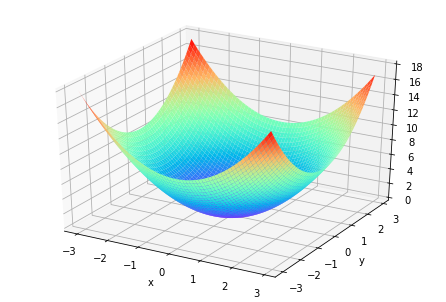

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(-3, 3, 0.1)
X = np.meshgrid(x, x)           # 创建网格
Z = function_2(X)
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X[0], X[1], Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

问题1：求 $x_0 = 3$, $x_1 = 4$ 时，关于 $x_0$ 的偏导数 $ \frac{\partial f}{\partial x_0} $。

In [15]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [16]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

问题2：求 $x_0 = 3$, $x_1 = 4$ 时，关于 $x_1$ 的偏导数 $ \frac{\partial f}{\partial x_1} $。

In [17]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [18]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

在这些问题中，我们又重新定义了一个只有一个变量的临时函数，并对这个函数进行了求导。从上面的计算结果来看，与解析解的导数基本一致。

# 4. 梯度

在刚才的例子中，我们按变量分别计算了 $x_0$ 和 $x_1$ 的偏导数。像这样的由全部变量的偏导数汇总而成的向量称为 **梯度**（gradient）。梯度可以像下面这样来实现。函数的实现看上去有些复杂，但它执行的处理和求单变量的数值微分基本没有区别。

In [19]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

我们可以计算 $(x_0, x_1)$ 在各点处的梯度：

In [20]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [21]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

## 4.1 梯度下降法

机器学习的主要任务是在学习时寻找最优参数。同样地，神经网络也必须在学习时找到最优参数（权重和偏置）。这里所说的最优参数是指损失函数取最小值时的参数。但是，一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值。而通过使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是 **梯度下降法**。

在梯度下降法中，函数的取值从当前位置沿着负梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新的负梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿负梯度方向前进，逐渐减小函数值的过程就是 **梯度下降法**（gradient descent method）。梯度法是解决机器学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。


需要注意的是，负梯度表示的是各点处的函数值减小最多的方向。因此，无法保证负梯度所指的方向就是函数的最小值或者真正应该前进的方向。实际上，在复杂的函数中，负梯度指示的方向基本上都不是函数值最小处。

用数学式来表示梯度法，

$$ x_0^{(k+1)} = x_0^{(k)} - \eta \frac{\partial f}{\partial x_0^{(k)}} $$

式中的 $\eta$  表示更新量，在神经网络的学习中，称为 **学习率**（**lr**, learning rate）。学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。


下面，我们用 Python 来实现梯度下降法。如下所示，这个实现很简单。

In [22]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

其中，参数 f 是要进行最优化的函数，init_x 是初始值，lr 是学习率 learning rate，step_num 是梯度法的重复次数。numerical_gradient(f,x) 会求函数的梯度，用该梯度乘以学习率得到的值进行更新操作，由 step_num 指定迭代的次数。

问题：请用梯度下降法求 $ f(x_0, x_1) = x_0^2 + x_1^2 $ 的最小值。

In [23]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [24]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

这里设初始值为(-3.0, 4.0)，使用梯度法寻找最小值，最终的结果是(-6.1e-10, 8.1e-10)，非常接近(0，0)。所以说通过梯度法我们基本得到了正确结果。

像学习率这样的参数称为 **超参数**。这是一种和神经网络的参数（权重和偏置）性质不同的参数。相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利进行的设定。学习率过大或者过小都无法得到好的结果:

In [25]:
# 学习率过大的例子：lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [26]:
# 学习率过小的例子：lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [27]:
# 学习率精确的例子：lr=0.5
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.5, step_num=1)

array([1.89004368e-12, 4.40536496e-13])

设定合适的学习率很重要：学习率过大的话，会发散成一个很大的值；相反，学习率过小的话，基本上没怎么更新就结束了。

## 4.2 神经网络的梯度

神经网络的梯度是指损失函数关于权重参数的梯度。对于一个形状为 2 × 3 的权重 $W$ 的神经网络，损失函数用 $L$ 表示。梯度可以用 $\frac{\partial L}{\partial W}$ 表示，它的元素由各个元素关于 $W$ 的偏导数构成。

$$ W =  \bigl( \begin{matrix}
w_{11}&w_{21}&w_{31}\\
w_{12}&w_{22}&w_{32}
\end{matrix}\bigr) $$

$$ \frac{\partial L}{\partial W} =  \bigl( \begin{matrix}
\frac{\partial L}{\partial w_{11}}&\frac{\partial L}{\partial w_{21}}&\frac{\partial L}{\partial w_{31}}\\
\frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}}
\end{matrix}\bigr) $$

下面，我们以一个简单的神经网络为例，来实现求梯度的代码。

In [28]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a - np.max(a)) # 溢出对策
    return exp_a / np.sum(exp_a)

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用标准正态分布进行初始化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
    
    def numerical_gradient(self, W, x, t):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(W)
        
        it = np.nditer(W, flags=['multi_index'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = W[idx]
            W[idx] = float(tmp_val) + h
            fxh1 = self.loss(x, t) # f(x+h)
            
            W[idx] = tmp_val - h 
            fxh2 = self.loss(x, t) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            W[idx] = tmp_val # 还原值
            it.iternext()
            
        return grad

In [29]:
np.random.seed(1)
net = simpleNet()
print(net.W) # 权重参数

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]


In [30]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.00893546  0.41181302 -2.38828788]


In [31]:
np.argmax(p)            # 最大值的索引

1

In [32]:
t = np.array([0, 1, 0]) # 设定正确解标签
net.loss(x, t)

0.5476574632667771

In [33]:
dW = net.numerical_gradient(net.W, x, t)
print(dW)

[[ 0.23192042 -0.25301826  0.02109785]
 [ 0.34788063 -0.3795274   0.03164677]]


求出神经网络的梯度后，接下来只需根据梯度下降法，更新权重参数即可。

# 5. 学习算法的实现

神经网络的学习步骤如下所示：

- 前提
      神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面4 个步骤。

- 步骤1（mini-batch）
      从训练数据中随机选出一部分数据，这部分数据称为 mini-batch。我们的目标是减小 mini-batch 的损失函数的值。

- 步骤2（计算梯度）
      为了减小 mini-batch 的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减小最多的方向。
      
- 步骤3（更新参数）
      将权重参数沿负梯度方向进行微小更新。
      
- 步骤4（重复）
      重复步骤1、步骤2、步骤3。
      
神经网络的学习按照上面4 个步骤进行。这个方法通过梯度下降法更新参数，不过因为这里使用的数据是随机选择的 mini batch 数据，所以又称为
**随机梯度下降法**（SGD, stochastic gradient descent）。“随机”指的是“随机选择的”的意思，因此，随机梯度下降法是“对随机选择的数据进行的梯度下降法”。

## 5.1 两层神经网络的类

首先，我们将这个 2 层神经网络实现为一个名为 TwoLayerNet 的类。

TwoLayerNet类的方法：

|方法|说明|
|:---|:---|
|\_\_init\_\_(self, input_size, hidden_size, output_size)|进行初始化。参数依次表示输入层的神经元数、隐藏层的神经元数、输出层的神经元数|
|predict(self, x)|进行识别（推理）。参数 x 是图像数据|
|loss(self, x, t)|计算损失函数的值。参数 x 是图像数据，t 是正确解标签|
|accuracy(self, x, t) |计算识别精度|
|numerical_gradient(self, W, x, t)|计算权重参数 W 的梯度|
|calc_grads(self, x, t) |计算权重参数的梯度|

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def softmax(a):
    exp_a = np.exp(a - np.max(a)) # 溢出对策
    return exp_a / np.sum(exp_a)

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

Python 代码如下：

In [35]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x:输入数据, t:标签数据
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, W, x, t):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(W)

        it = np.nditer(W, flags=['multi_index'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = W[idx]
            W[idx] = float(tmp_val) + h
            fxh1 = self.loss(x, t) # f(x+h)
            
            W[idx] = tmp_val - h 
            fxh2 = self.loss(x, t) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            W[idx] = tmp_val # 还原值
            it.iternext()
            
        return grad

    # x:输入数据, t:监督数据
    def calc_grads(self, x, t):
        grads = {}
        grads['W1'] = self.numerical_gradient(self.params['W1'], x, t)
        grads['b1'] = self.numerical_gradient(self.params['b1'], x, t)
        grads['W2'] = self.numerical_gradient(self.params['W2'], x, t)
        grads['b2'] = self.numerical_gradient(self.params['b2'], x, t)
        
        return grads

TwoLayerNet 类有 params 和 grads 两个字典型实例变量。params 变量中保存了该神经网络所需的全部参数。

- params['W1']是第 1 层的权重
- params['b1']是第 1 层的偏置
- params['W2']是第 2 层的权重
- params['b2']是第 2 层的偏置

grads 保存梯度的字典型变量（calc_gradient()方法的返回值）。

- grads['W1']是第 1 层权重的梯度
- grads['b1']是第 1 层偏置的梯度
- grads['W2']是第 2 层权重的梯度
- grads['b2']是第 2 层偏置的梯度

In [36]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


\_\_init\_\_(self, input_size, hidden_size, output_size)方法是类的初始化方法。从第 1 个参数开始，依次表示输入层的神经元数、隐藏层的神经元数、输出层的神经元数。

因为进行手写数字识别时，输入图像的大小是 784（28 × 28），输出为 10 个类别，所以指定参数 input_size=784、output_size=10，将隐藏层的个数hidden_size 设置为一个合适的值即可。

这个初始化方法会对权重参数进行初始化。如何设置权重参数的初始值，这个问题是关系到神经网络能否成功学习的重要问题，后面我们会详细讨论权重参数的初始化。这里只需要知道，权重使用符合高斯分布的随机数进行初始化，同时偏置使用 0 进行初始化。

In [37]:
x = np.random.rand(5, 784) # 伪输入数据（5笔）
t = np.random.rand(5, 10) # 伪正确解标签（5笔）

grads = net.calc_grads(x, t) # 计算梯度
print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


numerical_gradient(self, W, x, t) 基于数值微分计算参数的梯度。下一章，我们会介绍一个高速计算梯度的方法，称为误差反向传播法。用误差反向传播法求到的梯度和数值微分的结果基本一致，但可以高速地进行处理。

## 5.2 实现mini-batch

mini-batch 学习，就是从训练数据中随机选择一部分数据（称为 mini-batch），再以这些 mini-batch 为对象，使用梯度法更新参数的过程。

首先，重新定义一个适用于 mnist 数据集标签编码（非one-hot编码），并且兼容 mini-batch 的交叉熵误差函数：

In [38]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [39]:
from demo_code.download import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist()
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

train_loss_list = []
# 超参数
iters_num = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

Dataset loading completed


In [40]:
for i in range(iters_num):
    # 随机取出 mini-batch 个数据
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.calc_grads(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

这里，mini-batch 的大小为 100，需要每次从 60000 个训练数据中随机取出 100 个数据（图像数据和标签数据）。然后，对这个包含 100 笔数据的 mini-batch 求梯度，使用随机梯度下降法（SGD）更新参数。这里，梯度法的迭代次数为 20 次，每更新一次，都对训练数据计算损失函数的值，并将该值添加到数组 train_loss_list 中。

In [41]:
train_loss_list

[6.855486577200159,
 6.823671749479095,
 6.835131697872376,
 6.81344516485538,
 6.804924886508859,
 6.783756518704933,
 6.780124577138939,
 6.720764042746583,
 6.737207090712719,
 6.686570422952107,
 6.615389017451113,
 6.633899040763993,
 6.639161929534347,
 6.578111916318945,
 6.5278889717575295,
 6.561994227380155,
 6.516004337448319,
 6.445128758647716,
 6.4181619092512365,
 6.39716006235629]

可以发现随着学习的进行，损失函数的值在不断减小。这是学习正常进行的信号，表示神经网络的权重参数在逐渐拟合数据。

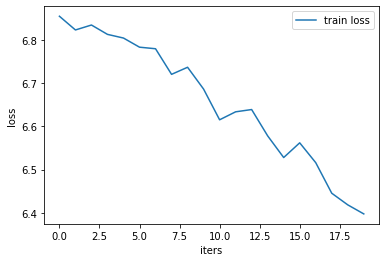

In [42]:
# 绘制图形
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iters")
plt.ylabel("loss")
plt.legend(loc='upper right')
plt.show()

## 5.3 基于测试数据的评价

上一小节验证了通过反复学习可以使损失函数的值逐渐减小这一结果，不过这个损失函数的值，严格地讲是“对训练数据的某个 mini-batch 的损失函数”的值。训练数据的损失函数值减小，虽说是神经网络的学习正常进行的一个信号，但光看这个结果还不能说明该神经网络在其它数据集上也一定能有同等程度的表现。

神经网络的学习中，必须确认是否能够正确识别训练数据以外的其他数据，即确认是否会发生**过拟合**。过拟合是指，虽然训练数据中的数字图像能被正确辨别，但是不在训练数据中的数字图像却无法被识别的现象。

下面的代码在进行学习的过程中，会定期地对训练数据和测试数据记录识别精度。这里，每经过一个 **epoch**（所有训练数据均被使用过一次），我们都会记录下训练数据和测试数据的识别精度，从而使用测试数据来评判神经网络的泛化能力。

In [43]:
iters_num = 6000

train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

#     # 计算梯度
#     grad = network.calc_grads(x_batch, t_batch)
    
#     # 更新参数
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
    
#     # 记录学习过程
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
#     # 计算每个epoch的识别精度
#     if i % iter_per_epoch == 0:
#         train_acc = network.accuracy(x_train, t_train)
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

每经过一个 epoch，就对所有的训练数据和测试数据计算识别精度，并记录结果。之所以只计算每个 epoch 的识别精度，是因为如果在 for 语句的迭代循环中一直计算识别精度会花费太多时间，并且也没有必要那么频繁地记录识别精度。

请注意，示例代码中的 mini-batch 每次都是随机选择的，所以不一定每个数据都会被选择到。实际上，一般做法是事先将所有训练数据随机打乱(shuffle)，然后按指定的批次大小按序生成 mini-batch，这样可以保证在一个 epoch 内可以使用到所有训练数据。